In [9]:
# model wrapper
import sys
import os
ROOT_DIR = os.getenv('MB_ROOT_PATH')
sys.path.append(ROOT_DIR)
from models.all_models.model_3L_abs_blurpool_avgpool import ExpansionModel
from models.all_models.alexnet import Alexnet

from tools.loading import *
from tools.processing import *
import torch
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import top_k_accuracy_score as top_k
from analysis.encoding_model_analysis.tools.utils import get_activations_iden, get_scores_iden
from analysis.encoding_model_analysis.tools.extractor import Activations
import torchvision
from train import * 

DATA_DIR = os.getenv('MB_DATA_PATH')
ACTIVATIONS_PATH = os.path.join(DATA_DIR,'activations') 
DATASET, MODE = 'places', None
HOOK = 'pca'
MAX_POOL = True

In [2]:
with open(os.path.join('/data/atlas/datasets/places/categories_places365.txt'), "r") as file:
    content = file.read()
annotations = content.split('\n')
cat_names = {}
for i in annotations:
    name_number = i[3:].split(' ')
    cat_names[int(name_number[1])] = name_number[0]

In [7]:
validation_categories = load_places_cat_labels()
swapped = {v: k for k, v in validation_categories.items()}

pub/indoor


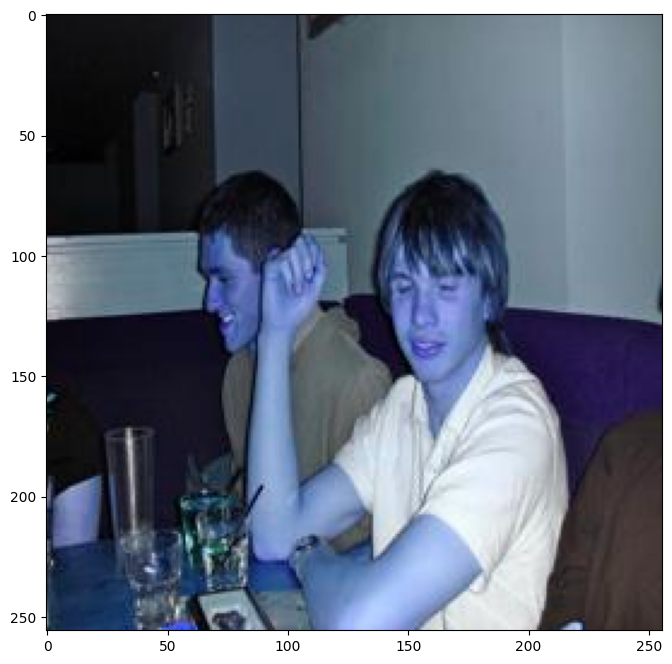

In [15]:
import cv2
import matplotlib.pyplot as plt

image = 'Places365_val_00000100.jpg'
print(cat_names[validation_categories[image]])


# Load the image
im = cv2.imread(f'/data/atlas/datasets/places/val_images/val_256/{image}')
fig = plt.figure(figsize=(8,8))
plt.imshow(im)